Задаём начальные условия

In [1]:
class PlotData:
    def __init__(self):
        self.p_average_max = 0
        self.omega_zero = 0
        self.p_values = [0, 0, 0, 0, 0]
        self.omega_values = [0, 0, 0, 0, 0]
        self.beta = 0
        
    def __str__(self):
        return f'{self.p_average_max}, {self.omega_zero}, {self.p_values}, {self.omega_values}, {self.beta}'
        
plot_data = PlotData()

In [2]:
from ipywidgets import interactive_output
import ipywidgets as widgets
from IPython.display import display

def set_values(_p_average_max, _omega_zero, p_first, p_second, p_third, p_fourth, p_end_first, p_end_second, omega_first, omega_second, omega_third, omega_fourth, omega_end_first, omega_end_second):
    plot_data.p_average_max = _p_average_max
    plot_data.omega_zero = _omega_zero
    plot_data.p_values = [p_end_first, p_first, p_second, _p_average_max, p_third, p_fourth, p_end_second]
    plot_data.omega_values = [omega_end_first, omega_first, omega_second, _omega_zero, omega_third, omega_fourth, omega_end_second]

p_max_slider = widgets.IntSlider(value=4, min=1, max=10, description='P max')
omega_zero_slider = widgets.IntSlider(value=250, min=150, max=350, description='ω0')

p_first_slider = widgets.FloatSlider(value=0.5, min=0, max=10, description='P1', step=0.1)
p_second_slider = widgets.FloatSlider(value=1, min=0, max=10, description='P2', step=0.1)
p_third_slider = widgets.FloatSlider(value=1, min=0, max=10, description='P3', step=0.1)
p_fourth_slider = widgets.FloatSlider(value=0.5, min=0, max=10, description='P4', step=0.1)
p_end_first_slider = widgets.FloatSlider(value=0.2, min=0.1, max=10, description='P end1', step=0.1)
p_end_second_slider = widgets.FloatSlider(value=0.3, min=0.1, max=10, description='P end2', step=0.1)

omega_first_slider = widgets.IntSlider(value=150, min=150, max=350, description='ω1')
omega_second_slider = widgets.IntSlider(value=190, min=150, max=350, description='ω2')
omega_third_slider = widgets.IntSlider(value=310, min=150, max=400, description='ω3')
omega_fourth_slider = widgets.IntSlider(value=360, min=150, max=400, description='ω4')
omega_end_first_slider = widgets.IntSlider(value=100, min=100, max=350, description='ω end1')
omega_end_second_slider = widgets.IntSlider(value=400, min=150, max=400, description='ω end2')

resonanse_block = widgets.HBox([p_max_slider, omega_zero_slider])
p_first_block = widgets.HBox([p_first_slider, omega_first_slider])
p_second_block = widgets.HBox([p_second_slider, omega_second_slider])
p_third_block = widgets.HBox([p_third_slider, omega_third_slider])
p_fourth_block = widgets.HBox([p_fourth_slider, omega_fourth_slider])
p_end_first_block = widgets.HBox([p_end_first_slider, omega_end_first_slider])
p_end_second_block = widgets.HBox([p_end_second_slider, omega_end_second_slider])
set_values_ui = widgets.VBox([resonanse_block, p_first_block, p_second_block, p_third_block, p_fourth_block, p_end_first_block, p_end_second_block])

set_values_widget = interactive_output(set_values, {
    '_p_average_max': p_max_slider,
    '_omega_zero': omega_zero_slider,
    'p_first': p_first_slider,
    'p_second': p_second_slider,
    'p_third': p_third_slider,
    'p_fourth': p_fourth_slider,
    'omega_first': omega_first_slider,
    'omega_second': omega_second_slider,
    'omega_third': omega_third_slider,
    'omega_fourth': omega_fourth_slider,
    'p_end_first': p_end_first_slider,
    'p_end_second': p_end_second_slider,
    'omega_end_first': omega_end_first_slider,
    'omega_end_second': omega_end_second_slider,
})

display(set_values_ui, set_values_widget)

Output()

Строим приблежённый график по заданным точкам
-----

Отмечаем точки

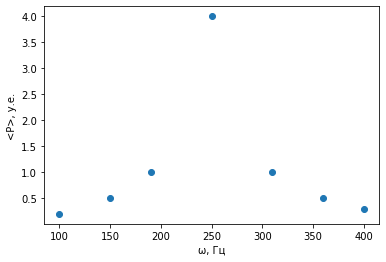

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(plot_data.omega_values)
y = np.array(plot_data.p_values)

plt.scatter(x, y)
plt.xlabel("ω, Гц")
plt.ylabel("<P>, у.е.")
plt.show()

Строим плавную кривую

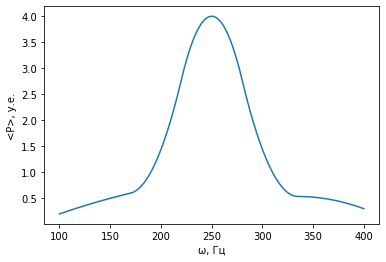

In [4]:
import numpy as np
import scipy.interpolate

curve = scipy.interpolate.interp1d(x, y, kind=2)
X_ = np.linspace(x.min(), x.max(), 500 )
Y_ = curve(X_)

plt.plot(X_, Y_)
plt.xlabel("ω, Гц")
plt.ylabel("<P>, у.е.")
plt.show()

Подбираем коэффициент затухания
-----

In [22]:
from ipywidgets import interact

def theoretic_p(omega, omega_zero, beta):
    return (16*omega*omega*beta*beta)/((omega*omega - omega_zero*omega_zero)*(omega*omega - omega_zero*omega_zero) + 4*beta*beta*omega*omega)
theoretic_p = np.vectorize(theoretic_p, excluded={'omega_zero, beta'})

@interact(beta = widgets.FloatSlider(value=37.90, min=1, max=60, step=0.1, description='β'))
def set_beta_value(beta):
    plot_data.beta = beta

interactive(children=(FloatSlider(value=37.9, description='β', max=60.0, min=1.0), Output()), _dom_classes=('w…

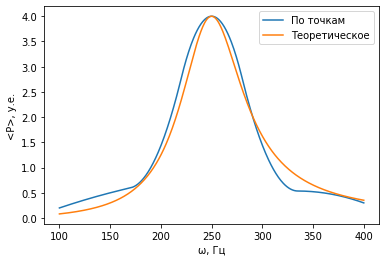

Среднеквадратичная ошибка: 0.04433236785892009


In [24]:
x_theoretical = np.linspace(x.min(), x.max(), 500)
y_theoretical = theoretic_p(x_theoretic, plot_data.omega_zero, plot_data.beta)

plt.plot(X_, Y_, label='По точкам')
plt.plot(x_theoretical, y_theoretical, label='Теоретическое')
plt.xlabel("ω, Гц")
plt.ylabel("<P>, у.е.")
plt.legend()
plt.show()

def calculate_mse(y_list):
    mse = 0
    for p_experimental, p_theoretical in zip(Y_, y_list):
        mse += (p_experimental - p_theoretical)*(p_experimental - p_theoretical)
    mse /= len(y_list)
    return mse

print(f'Среднеквадратичная ошибка: {calculate_mse(y_theoretical)}')

Поиск оптимального значения коэффициента затухания
---

Оптимальное значение β: 51.00005
Среднеквадратичная ошибка: 0.17004


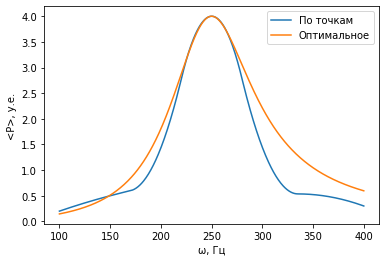

In [31]:
left_boundary = 1
right_boundary = 101

left_mse = calculate_mse(theoretic_p(x_theoretic, plot_data.omega_zero, left_boundary))
right_mse = calculate_mse(theoretic_p(x_theoretic, plot_data.omega_zero, right_boundary))

while (right_boundary - left_boundary > 1e-4):
    center = (right_boundary + left_boundary)/2
    center_mse = calculate_mse(theoretic_p(x_theoretic, plot_data.omega_zero, center))
    if center_mse < left_mse:
        left_boundary = center
        left_mse = center_mse
    elif center_mse < right_mse:
        right_boundary = center
        right_mse = center_mse
    elif left_mse < right_mse:
        right_boundary = center
        right_mse = center_mse
    else:
        left_boundary = center
        left_mse = center_mse
        
optimal_beta = (left_boundary+right_boundary)/2
y_optimal = theoretic_p(x_theoretic, plot_data.omega_zero, optimal_beta)
optimal_mse = calculate_mse(y_optimal)

print(f'Оптимальное значение β: {optimal_beta:.5f}\nСреднеквадратичная ошибка: {optimal_mse:.5f}')

plt.plot(X_, Y_, label='По точкам')
plt.plot(x_theoretical, y_optimal, label='Оптимальное')
plt.xlabel("ω, Гц")
plt.ylabel("<P>, у.е.")
plt.legend()
plt.show()